In [1]:
# Import dependencies
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', 400)

### Extract the crowdfunding.xlsx Data

In [2]:
# Read the data into a Pandas DataFrame
crowdfunding_info_df = pd.read_excel('Resources/crowdfunding.xlsx')
crowdfunding_info_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays


In [3]:
# Get a brief summary of the crowdfunding_info DataFrame.
crowdfunding_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   cf_id                    1000 non-null   int64 
 1   contact_id               1000 non-null   int64 
 2   company_name             1000 non-null   object
 3   blurb                    1000 non-null   object
 4   goal                     1000 non-null   int64 
 5   pledged                  1000 non-null   int64 
 6   outcome                  1000 non-null   object
 7   backers_count            1000 non-null   int64 
 8   country                  1000 non-null   object
 9   currency                 1000 non-null   object
 10  launched_at              1000 non-null   int64 
 11  deadline                 1000 non-null   int64 
 12  staff_pick               1000 non-null   bool  
 13  spotlight                1000 non-null   bool  
 14  category & sub-category  1000 non-null   

### Create the Category and Subcategory DataFrames
---
**Create a Category DataFrame that has the following columns:**
* A "category_id" column that has entries going sequentially from "cat1" to "cat*n*", where *n* is the number of unique categories
* A "category" column that contains only the category titles

Export the DataFrame as a `category.csv` CSV file.

**Create a SubCategory DataFrame that has the following columns:**
* A "subcategory_id" column that has entries going sequentially from "subcat1" to "subcat*n*", where *n* is the number of unique subcategories
* A "subcategory" column that contains only the subcategory titles

Export the DataFrame as a `subcategory.csv` CSV file.

In [4]:
# Get the crowdfunding_info_df columns.
crowdfunding_info_columns_list = crowdfunding_info_df.columns
crowdfunding_info_columns_list

Index(['cf_id', 'contact_id', 'company_name', 'blurb', 'goal', 'pledged',
       'outcome', 'backers_count', 'country', 'currency', 'launched_at',
       'deadline', 'staff_pick', 'spotlight', 'category & sub-category'],
      dtype='object')

In [5]:
# Assign the category and subcategory values to category and subcategory columns.
# There is a column named `category & sub-category` in the crowdfunding_info_df DataFrame. This needs to be split into two columns using / as as the delimiter.

# Split the 'category & sub-category' column into two columns.
crowdfunding_info_df[['category', 'subcategory']] = crowdfunding_info_df['category & sub-category'].str.split('/', expand=True)

# Display the new dataframe.
crowdfunding_info_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [6]:
# Get the unique categories and subcategories in separate lists.
# Obtain the unique categories
categories_list = crowdfunding_info_df['category'].unique()

# Obtain the unique subcategories
subcategories_list = crowdfunding_info_df['subcategory'].unique()

print(categories_list)
print(subcategories_list)

['food' 'music' 'technology' 'theater' 'film & video' 'publishing' 'games'
 'photography' 'journalism']
['food trucks' 'rock' 'web' 'plays' 'documentary' 'electric music' 'drama'
 'indie rock' 'wearables' 'nonfiction' 'animation' 'video games' 'shorts'
 'fiction' 'photography books' 'radio & podcasts' 'metal' 'jazz'
 'translations' 'television' 'mobile games' 'world music'
 'science fiction' 'audio']


In [7]:
# Get the number of distinct values in the categories and subcategories lists.
cat_len = len(categories_list)
subcat_len = len(subcategories_list)

print(f'The number of unique categories is {cat_len}.')
print(f'The number of unique subcategories is {subcat_len}.')

The number of unique categories is 9.
The number of unique subcategories is 24.


In [8]:
# Create numpy arrays from 1-9 for the categories and 1-24 for the subcategories.
category_ids = np.arange(1, 10)
subcategory_ids = np.arange(1, 25)

print(f'The number of category_ids is {len(category_ids)}. This is the list:')
print(f'{category_ids}\n')
print(f'The number of subcategory_ids is {len(subcategory_ids)}. This is the list:')
print(subcategory_ids)

The number of category_ids is 9. This is the list:
[1 2 3 4 5 6 7 8 9]

The number of subcategory_ids is 24. This is the list:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [9]:
# Use a list comprehension to add "cat" to each category_id.
cat_ids = ["cat" + str(id) for id in category_ids]

# Use a list comprehension to add "subcat" to each subcategory_id
subcat_ids = ["subcat" + str(id) for id in subcategory_ids]

print(cat_ids)
print(subcat_ids)

['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
['subcat1', 'subcat2', 'subcat3', 'subcat4', 'subcat5', 'subcat6', 'subcat7', 'subcat8', 'subcat9', 'subcat10', 'subcat11', 'subcat12', 'subcat13', 'subcat14', 'subcat15', 'subcat16', 'subcat17', 'subcat18', 'subcat19', 'subcat20', 'subcat21', 'subcat22', 'subcat23', 'subcat24']


In [10]:
# Create a category DataFrame with the category_id array as the category_id and categories list as the category name.
category_df = pd.DataFrame({
    'category_id': cat_ids,
    'category': categories_list
})

# Create a category DataFrame with the subcategory_id array as the subcategory_id and subcategories list as the subcategory name. 
subcategory_df = pd.DataFrame({
    'subcategory_id': subcat_ids,
    'subcategory': subcategories_list
})

# Displaying the two new DataFrames.
print(category_df.head())
print(subcategory_df.head())

  category_id      category
0        cat1          food
1        cat2         music
2        cat3    technology
3        cat4       theater
4        cat5  film & video
  subcategory_id  subcategory
0        subcat1  food trucks
1        subcat2         rock
2        subcat3          web
3        subcat4        plays
4        subcat5  documentary


In [11]:
category_df

,category_id,category
0,cat1,food
1,cat2,music
2,cat3,technology
3,cat4,theater
4,cat5,film & video
5,cat6,publishing
6,cat7,games
7,cat8,photography
8,cat9,journalism


In [12]:
subcategory_df

,subcategory_id,subcategory
0,subcat1,food trucks
1,subcat2,rock
2,subcat3,web
3,subcat4,plays
4,subcat5,documentary
5,subcat6,electric music
6,subcat7,drama
7,subcat8,indie rock
8,subcat9,wearables
9,subcat10,nonfiction


In [13]:
# Export categories_df and subcategories_df as CSV files.
category_df.to_csv("Resources/category.csv", index=False)

subcategory_df.to_csv("Resources/subcategory.csv", index=False)

### Campaign DataFrame
----
**Create a Campaign DataFrame that has the following columns:**
- The "cf_id" column.
- The "contact_id" column.
- The “company_name” column.
- The "blurb" column is renamed as "description."
- The "goal" column.
- The "goal" column is converted to a `float` datatype.
- The "pledged" column is converted to a `float` datatype. 
- The "backers_count" column. 
- The "country" column.
- The "currency" column.
- The "launched_at" column is renamed as "launch_date" and converted to a datetime format. 
- The "deadline" column is renamed as "end_date" and converted to a datetime format.
- The "category_id" with the unique number matching the “category_id” from the category DataFrame. 
- The "subcategory_id" with the unique number matching the “subcategory_id” from the subcategory DataFrame.
- And, create a column that contains the unique four-digit contact ID number from the `contact.xlsx` file.
 

Then export the DataFrame as a `campaign.csv` CSV file.


In [14]:
# Create a copy of the crowdfunding_info_df DataFrame name campaign_df. 
campaign_df = crowdfunding_info_df.copy()
campaign_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [15]:
# Rename the blurb, launched_at, and deadline columns.
campaign_df = campaign_df.rename(columns={
    'blurb': 'description',
    'launched_at': 'launch_date',
    'deadline': 'end_date'
})

# Display the first few rows of the campaign_df DataFrame.
campaign_df.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [16]:
# Convert the goal and pledged columns to a `float` data type.
campaign_df['goal'] = campaign_df['goal'].astype(float)
campaign_df['pledged'] = campaign_df['pledged'].astype(float)

# Display the first few rows of the campaign_df DataFrame.
campaign_df.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [17]:
# Check the datatypes
campaign_df.dtypes

cf_id                        int64
contact_id                   int64
company_name                object
description                 object
goal                       float64
pledged                    float64
outcome                     object
backers_count                int64
country                     object
currency                    object
launch_date                  int64
end_date                     int64
staff_pick                    bool
spotlight                     bool
category & sub-category     object
category                    object
subcategory                 object
dtype: object

In [18]:
# Format the launched_date and end_date columns to datetime format
from datetime import datetime as dt

campaign_df['launch_date'] = pd.to_datetime(campaign_df['launch_date'], unit='s').dt.date
campaign_df['end_date'] = pd.to_datetime(campaign_df['end_date'], unit='s').dt.date

# Display the first few rows of the campaign_df DataFrame.
campaign_df.head()


,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,2020-02-13,2021-03-01,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,2021-01-25,2021-05-25,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,2020-12-17,2021-12-30,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,2021-10-21,2022-01-17,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53,US,USD,2020-12-21,2021-08-23,False,False,theater/plays,theater,plays


In [19]:
# Merge the campaign_df with the category_df on the "category" column and 
# the subcategory_df on the "subcategory" column.

# Merge campaign_df with category_df on the "category" column.
campaign_merged_df = pd.merge(campaign_df, category_df, on='category', how='left')

# Merge campaign_df with subcategory_df on the "subcategory" column.
campaign_merged_df = pd.merge(campaign_merged_df, subcategory_df, on='subcategory', how='left')

# Display the first nine data rows of the campaign_merged_df DataFrame.
campaign_merged_df.tail(10)

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory,category_id,subcategory_id
990,1561,5500,Ortiz-Roberts,Devolved foreground customer loyalty,7800.0,6839.0,failed,64,US,USD,2021-06-09,2021-06-18,False,True,film & video/drama,film & video,drama,cat5,subcat7
991,2632,3494,Ramirez LLC,Reduced reciprocal focus group,9800.0,11091.0,successful,241,US,USD,2020-12-09,2021-05-26,False,True,music/rock,music,rock,cat2,subcat2
992,439,3924,Morrow Inc,Networked global migration,3100.0,13223.0,successful,132,US,USD,2020-06-14,2021-02-09,False,True,film & video/drama,film & video,drama,cat5,subcat7
993,461,3521,Erickson-Rogers,De-engineered even-keeled definition,9800.0,7608.0,canceled,75,IT,EUR,2021-07-03,2021-07-08,False,True,photography/photography books,photography,photography books,cat8,subcat15
994,1419,5262,"Leach, Rich and Price",Implemented bi-directional flexibility,141100.0,74073.0,failed,842,US,USD,2021-11-15,2021-12-07,False,True,publishing/translations,publishing,translations,cat6,subcat19
995,2986,3684,Manning-Hamilton,Vision-oriented scalable definition,97300.0,153216.0,successful,2043,US,USD,2020-12-29,2021-05-30,False,True,food/food trucks,food,food trucks,cat1,subcat1
996,2031,5784,Butler LLC,Future-proofed upward-trending migration,6600.0,4814.0,failed,112,US,USD,2021-10-15,2021-11-30,False,False,theater/plays,theater,plays,cat4,subcat4
997,1627,1498,Ball LLC,Right-sized full-range throughput,7600.0,4603.0,canceled,139,IT,EUR,2021-11-06,2021-12-10,False,False,theater/plays,theater,plays,cat4,subcat4
998,2175,6073,"Taylor, Santiago and Flores",Polarized composite customer loyalty,66600.0,37823.0,failed,374,US,USD,2020-10-08,2021-04-11,False,True,music/indie rock,music,indie rock,cat2,subcat8
999,1788,4939,"Hernandez, Norton and Kelley",Expanded eco-centric policy,111100.0,62819.0,canceled,1122,US,USD,2020-12-30,2021-08-18,False,False,food/food trucks,food,food trucks,cat1,subcat1


In [20]:
# Drop unwanted columns
# Define the columns to keep
columns_to_retain = [
    'cf_id', 'contact_id', 'company_name', 'description', 
    'goal', 'pledged', 'outcome', 'backers_count', 'country', 'currency', 
    'launch_date', 'end_date', 'category_id', 'subcategory_id'
]

# Drop the unwanted columns
campaign_merged_df = campaign_merged_df[columns_to_retain]

# Display the first few rows to verify the changes
campaign_merged_df.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,category_id,subcategory_id
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,2020-02-13,2021-03-01,cat1,subcat1
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,2021-01-25,2021-05-25,cat2,subcat2
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,2020-12-17,2021-12-30,cat3,subcat3
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,2021-10-21,2022-01-17,cat2,subcat2
4,1365,2199,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53,US,USD,2020-12-21,2021-08-23,cat4,subcat4


In [21]:
campaign_cleaned_df = campaign_merged_df.copy()

# Export the DataFrame as a CSV file. 
campaign_cleaned_df.to_csv("Resources/campaign.csv", index=False)

### Extract the contacts.xlsx Data

In [22]:
# Read the data into a Pandas DataFrame. Use the `header=2` parameter when reading in the data.
contact_info_df = pd.read_excel('Resources/contacts.xlsx', header=2)
contact_info_df.head()

,
0,contact_info
1,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}"
2,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}"
3,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}"
4,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}"


### Create the Contacts DataFrame 
---
**Create a Contacts DataFrame that has the following columns:**
- A column named "contact_id"  that contains the unique number of the contact person.
- A column named "first_name" that contains the first name of the contact person.
- A column named "last_name" that contains the first name of the contact person.
- A column named "email" that contains the email address of the contact person

Then export the DataFrame as a `contacts.csv` CSV file.

### Option 1: Use Pandas to create the contacts DataFrame.

In [23]:
# Iterate through the contact_info_df and convert each row to a dictionary.
import json
dict_values = []


# Print out the list of values for each row.
print(dict_values)

[]


In [24]:
# Create a contact_info DataFrame and add each list of values, i.e., each row 
# to the 'contact_id', 'name', 'email' columns.
# Load the contact_info_df (example data shown here, replace with actual data loading)
contact_info_df = pd.read_excel('Resources/contacts.xlsx', skiprows=3)
contact_info_df.head()

,contact_info
0,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}"
1,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}"
2,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}"
3,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}"
4,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}"


In [25]:
# Check the datatypes.
contact_info_df.dtypes

contact_info    object
dtype: object

In [26]:
# Initialize an empty list to store the parsed data
data_list = []

# Iterate through each row and parse the JSON string
for json_str in contact_info_df['contact_info']:
    data_list.append(json.loads(json_str))

# Create a new DataFrame from the parsed data
contact_cleaned_df = pd.DataFrame(data_list)

# 

# Display the first few rows of the new DataFrame
print(contact_cleaned_df.head())

   contact_id               name                         email
0        4661    Cecilia Velasco  cecilia.velasco@rodrigues.fr
1        3765      Mariana Ellis       mariana.ellis@rossi.org
2        4187        Sofie Woods       sofie.woods@riviere.com
3        4941  Jeanette Iannotti   jeanette.iannotti@yahoo.com
4        2199     Samuel Sorgatz      samuel.sorgatz@gmail.com


In [27]:
# Split the 'name' column into 'first_name' and 'last_name'
contact_cleaned_df[['first_name', 'last_name']] = contact_cleaned_df['name'].str.split(' ', expand=True)

contact_cleaned_df.head()




,contact_id,name,email,first_name,last_name
0,4661,Cecilia Velasco,cecilia.velasco@rodrigues.fr,Cecilia,Velasco
1,3765,Mariana Ellis,mariana.ellis@rossi.org,Mariana,Ellis
2,4187,Sofie Woods,sofie.woods@riviere.com,Sofie,Woods
3,4941,Jeanette Iannotti,jeanette.iannotti@yahoo.com,Jeanette,Iannotti
4,2199,Samuel Sorgatz,samuel.sorgatz@gmail.com,Samuel,Sorgatz


In [28]:
# Reorder the columns
# Select the desired columns
contacts_df = contact_cleaned_df[['contact_id', 'first_name', 'last_name', 'email']]

# Display the first few rows to verify the changes
print(contacts_df.head())

   contact_id first_name last_name                         email
0        4661    Cecilia   Velasco  cecilia.velasco@rodrigues.fr
1        3765    Mariana     Ellis       mariana.ellis@rossi.org
2        4187      Sofie     Woods       sofie.woods@riviere.com
3        4941   Jeanette  Iannotti   jeanette.iannotti@yahoo.com
4        2199     Samuel   Sorgatz      samuel.sorgatz@gmail.com


In [29]:
# Check the datatypes one more time before exporting as CSV file.
contacts_df.dtypes

contact_id     int64
first_name    object
last_name     object
email         object
dtype: object

In [30]:
# Export the DataFrame as a CSV file. 
contacts_df.to_csv("Resources/contacts_option1.csv", encoding='utf8', index=False)

### Option 2: Use regex to create the contacts DataFrame.

In [31]:
# Import the dependencies
import re

In [32]:
contact_df_copy = contact_info_df.copy()
contact_df_copy.head()

,contact_info
0,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}"
1,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}"
2,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}"
3,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}"
4,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}"


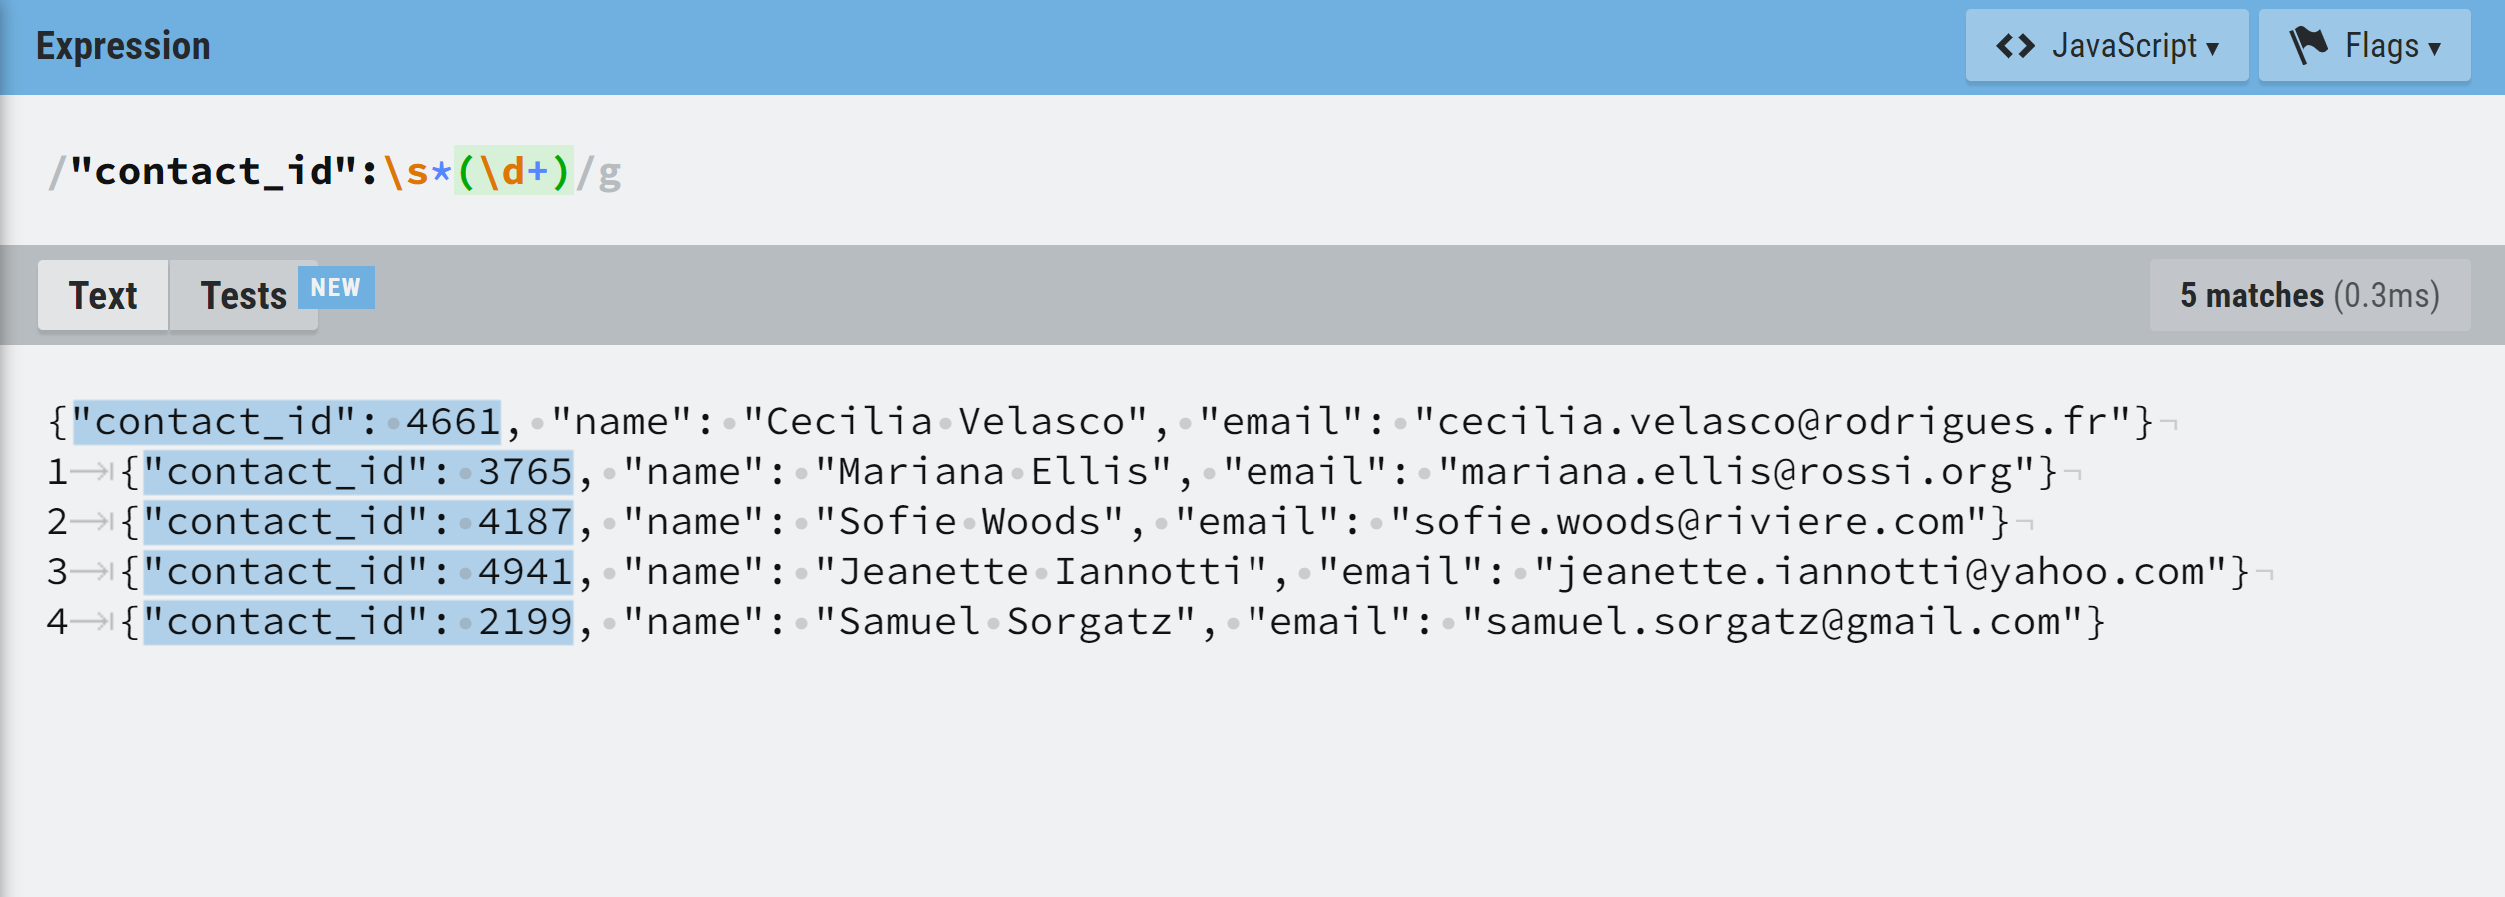

In [33]:
# Extract the four-digit contact ID number.
# Function to extract the contact ID using regex
def extract_contact_id(json_str):
    match = re.search(r'"contact_id":\s*(\d+)', json_str)
    if match:
        return int(match.group(1))
    return None

# Apply the function to the 'contact_info' column and create a new column 'contact_id'
contact_df_copy['contact_id'] = contact_df_copy['contact_info'].apply(extract_contact_id)

# Display the first few rows to verify the extraction
contact_df_copy[['contact_info', 'contact_id']].head()

,contact_info,contact_id
0,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}",4661
1,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}",3765
2,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}",4187
3,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}",4941
4,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}",2199


In [34]:
# Check the datatypes.
contact_df_copy.dtypes

contact_info    object
contact_id       int64
dtype: object

In [35]:
# Convert the "contact_id" column to an int64 data type.
# Done above

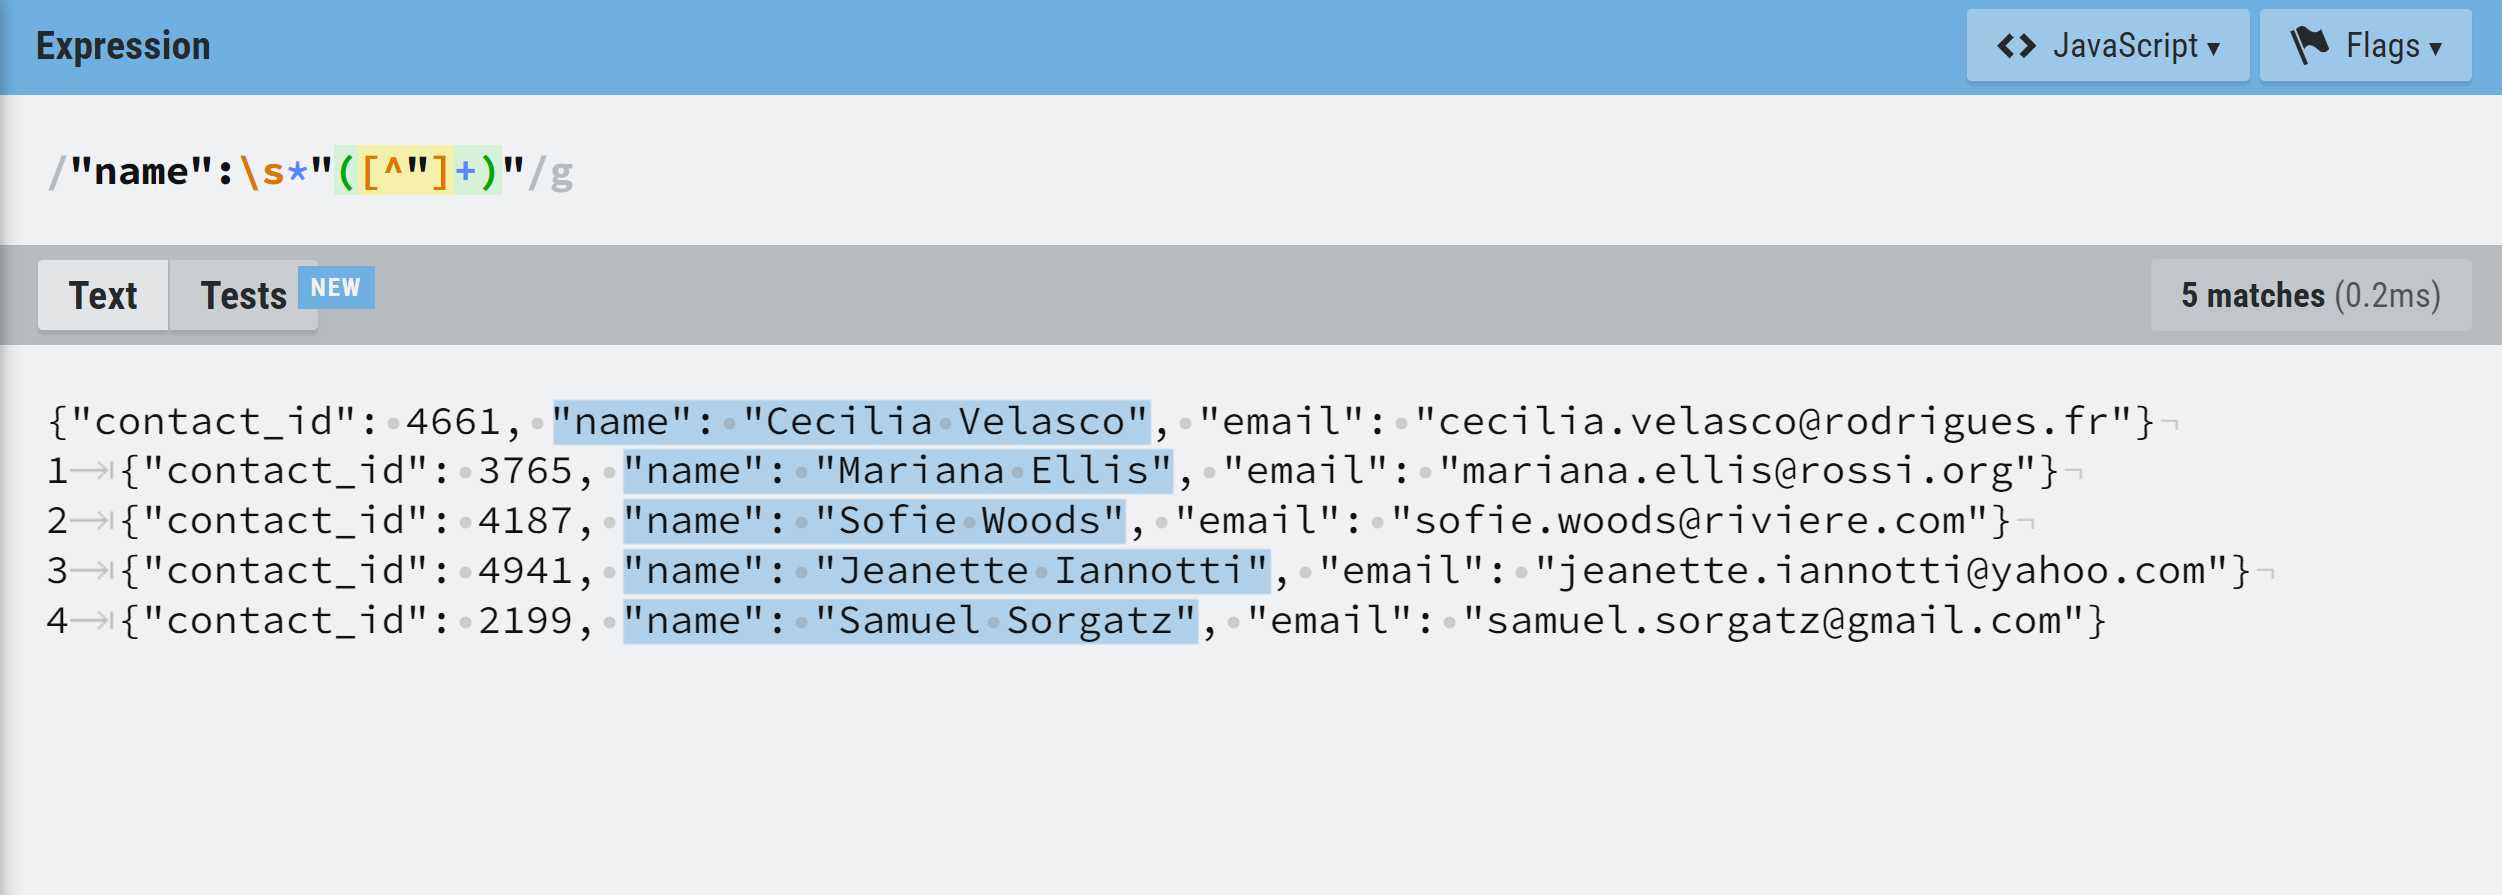

In [36]:
# Extract the name of the contact and add it to a new column.
# Function to extract the name of the contact using regex
def extract_contact_name(json_str):
    match = re.search(r'"name":\s*"([^"]+)"', json_str)
    if match:
        return match.group(1)
    return None

# Apply the function to the 'contact_info' column and create a new column 'contact_id'
contact_df_copy['contact_name'] = contact_df_copy['contact_info'].apply(extract_contact_name)

# Display the first few rows to verify the extraction
contact_df_copy[['contact_info', 'contact_id', 'contact_name']].head()

,contact_info,contact_id,contact_name
0,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}",4661,Cecilia Velasco
1,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}",3765,Mariana Ellis
2,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}",4187,Sofie Woods
3,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}",4941,Jeanette Iannotti
4,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}",2199,Samuel Sorgatz


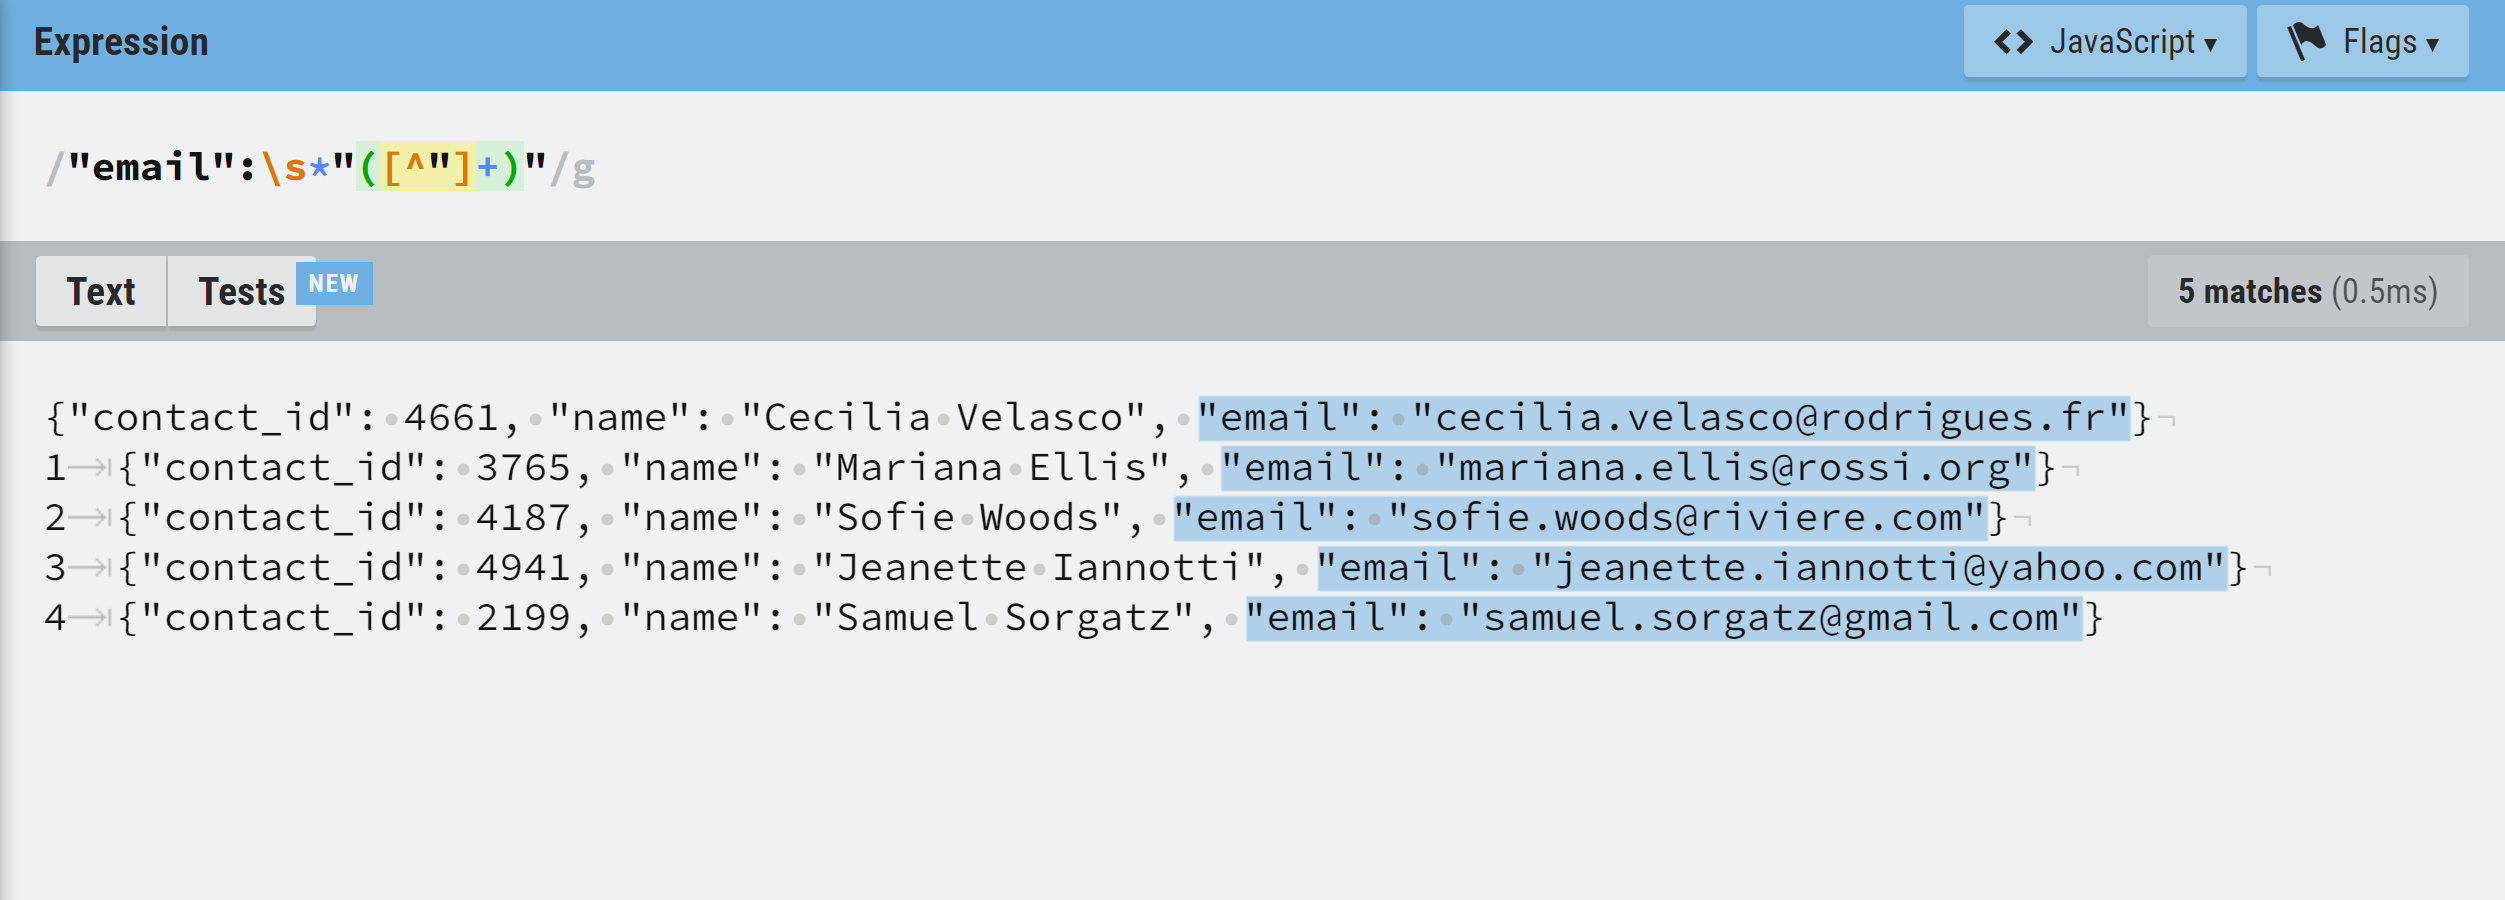

In [37]:
# Extract the email from the contacts and add the values to a new column.

def extract_contact_email(json_str):
    match = re.search(r'"email":\s*"([^"]+)"', json_str)
    if match:
        return match.group(1)
    return None

# Apply the function to the 'contact_info' column and create a new column 'contact_id'
contact_df_copy['contact_email'] = contact_df_copy['contact_info'].apply(extract_contact_email)

# Display the first few rows to verify the extraction
contact_df_copy[['contact_info', 'contact_id', 'contact_name','contact_email']].head()

,contact_info,contact_id,contact_name,contact_email
0,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}",4661,Cecilia Velasco,cecilia.velasco@rodrigues.fr
1,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}",3765,Mariana Ellis,mariana.ellis@rossi.org
2,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}",4187,Sofie Woods,sofie.woods@riviere.com
3,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}",4941,Jeanette Iannotti,jeanette.iannotti@yahoo.com
4,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}",2199,Samuel Sorgatz,samuel.sorgatz@gmail.com


In [38]:
# Create a copy of the contact_info_df with the 'contact_id', 'name', 'email' columns.
contacts_df2 = contact_df_copy[['contact_id', 'contact_name', 'contact_email']].copy()
contacts_df2.head()

,contact_id,contact_name,contact_email
0,4661,Cecilia Velasco,cecilia.velasco@rodrigues.fr
1,3765,Mariana Ellis,mariana.ellis@rossi.org
2,4187,Sofie Woods,sofie.woods@riviere.com
3,4941,Jeanette Iannotti,jeanette.iannotti@yahoo.com
4,2199,Samuel Sorgatz,samuel.sorgatz@gmail.com


In [39]:
# Create a "first"name" and "last_name" column with the first and last names from the "name" column. 
# Split the 'name' column into 'first_name' and 'last_name'
contacts_df2[['first_name', 'last_name']] = contacts_df2['contact_name'].str.split(' ', expand=True)

contacts_df2.head()

# Drop the contact_name column

contacts_df_clean2 = contacts_df2.drop(columns=['contact_name'])
contacts_df_clean2.head()


,contact_id,contact_email,first_name,last_name
0,4661,cecilia.velasco@rodrigues.fr,Cecilia,Velasco
1,3765,mariana.ellis@rossi.org,Mariana,Ellis
2,4187,sofie.woods@riviere.com,Sofie,Woods
3,4941,jeanette.iannotti@yahoo.com,Jeanette,Iannotti
4,2199,samuel.sorgatz@gmail.com,Samuel,Sorgatz


In [40]:
# Reorder the columns
contacts_df_clean2 = contacts_df_clean2[['contact_id', 'first_name', 'last_name', 'contact_email']]
contacts_df_clean2.head()

,contact_id,first_name,last_name,contact_email
0,4661,Cecilia,Velasco,cecilia.velasco@rodrigues.fr
1,3765,Mariana,Ellis,mariana.ellis@rossi.org
2,4187,Sofie,Woods,sofie.woods@riviere.com
3,4941,Jeanette,Iannotti,jeanette.iannotti@yahoo.com
4,2199,Samuel,Sorgatz,samuel.sorgatz@gmail.com


In [41]:
# Check the datatypes one more time before exporting as CSV file.
contacts_df_clean2.dtypes

contact_id        int64
first_name       object
last_name        object
contact_email    object
dtype: object

In [42]:
# Export the DataFrame as a CSV file. 
contacts_df_clean2.to_csv("Resources/contacts_option2.csv", encoding='utf8', index=False)

### ERD Diagram

[Used this Site for ERD Diagram](https://www.quickdatabasediagrams.com/)

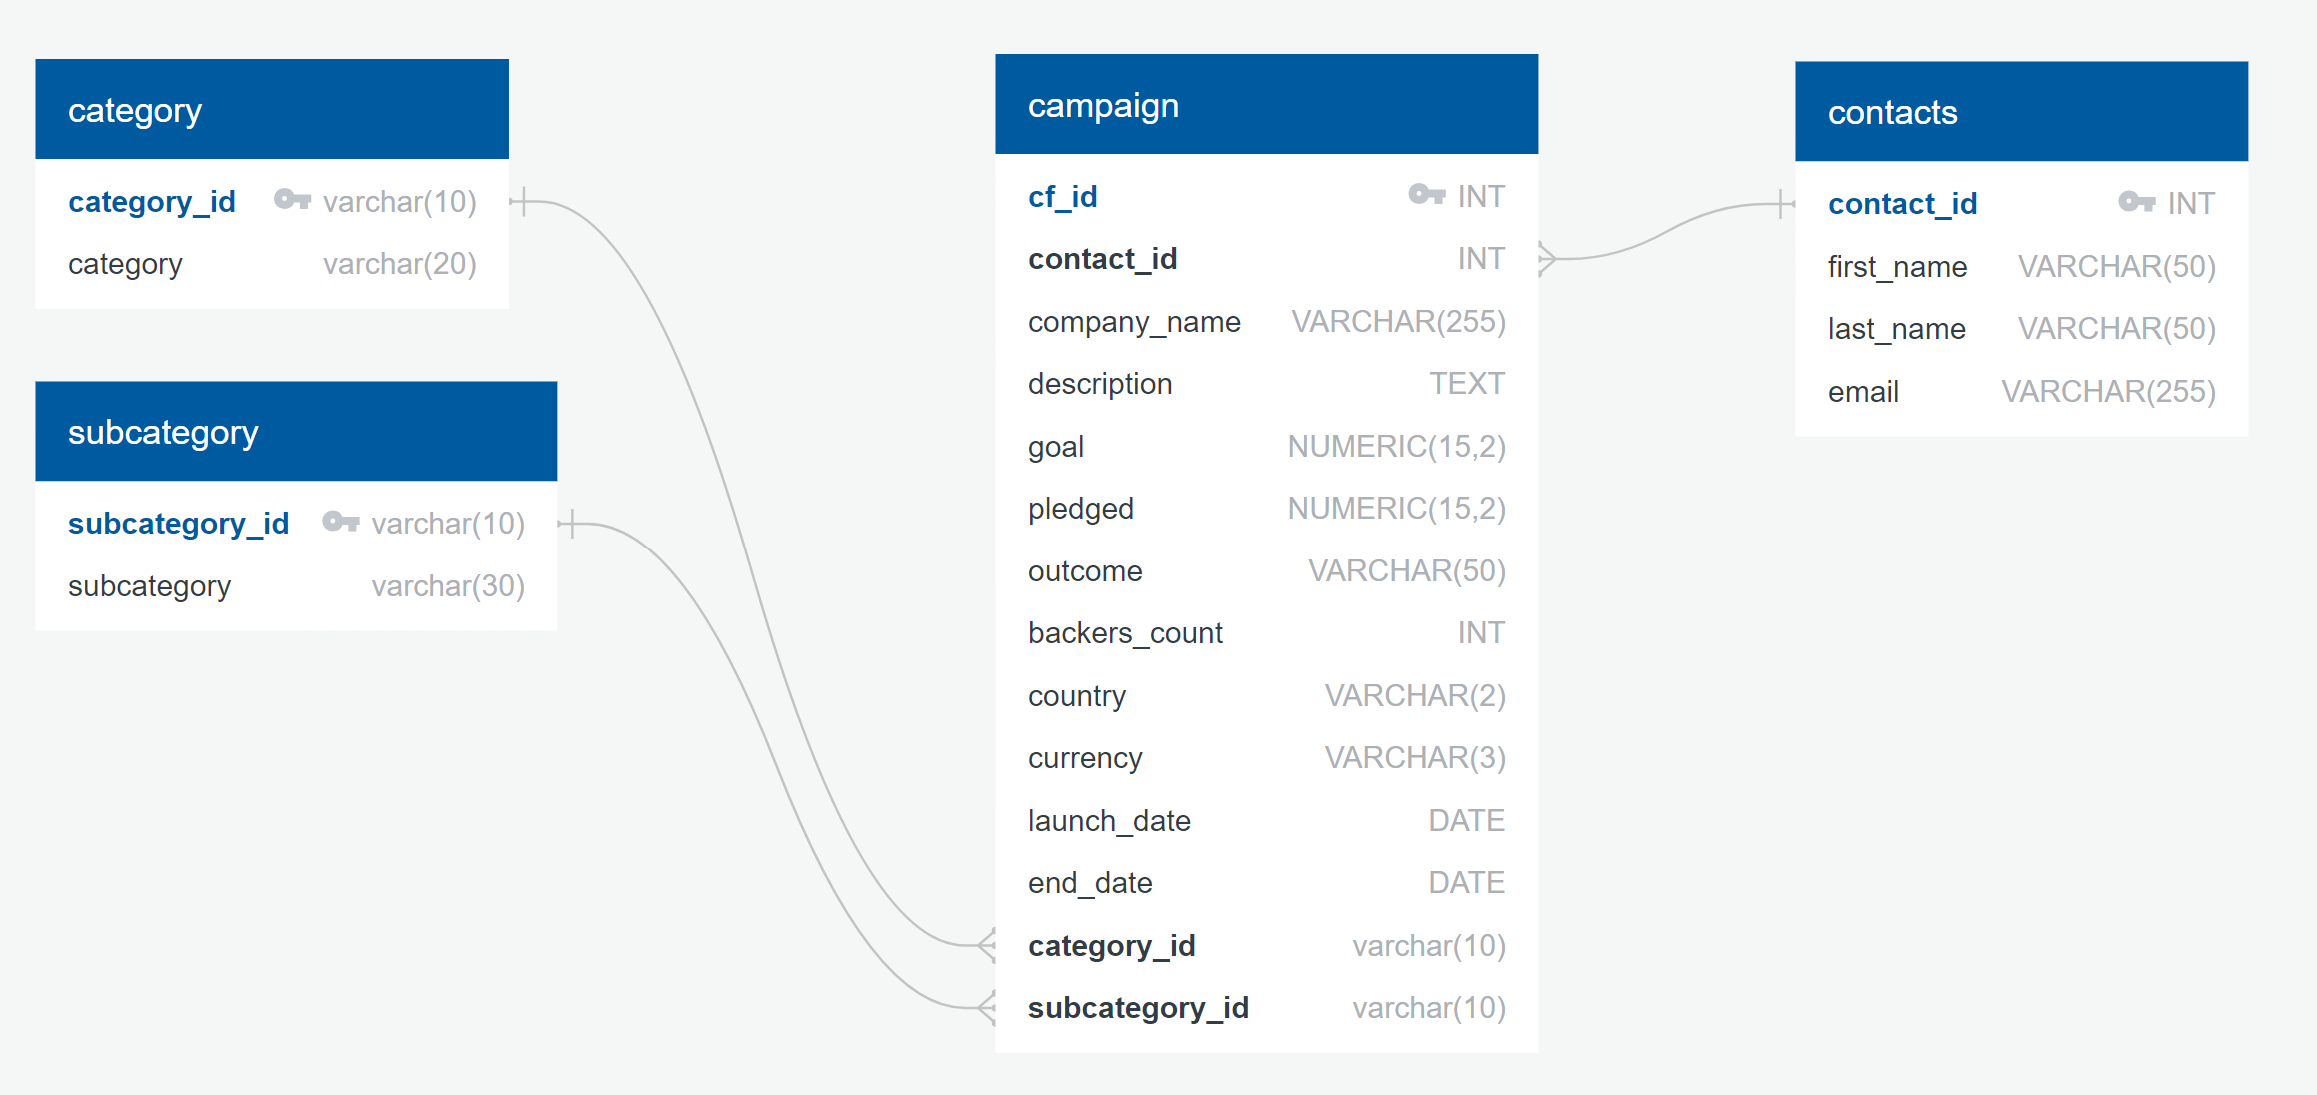

Starter code for schema development was written by Quick Database Diagrams. This was then edited accordingly to fit the needs of this project.

### Notes on SQL Schema Development

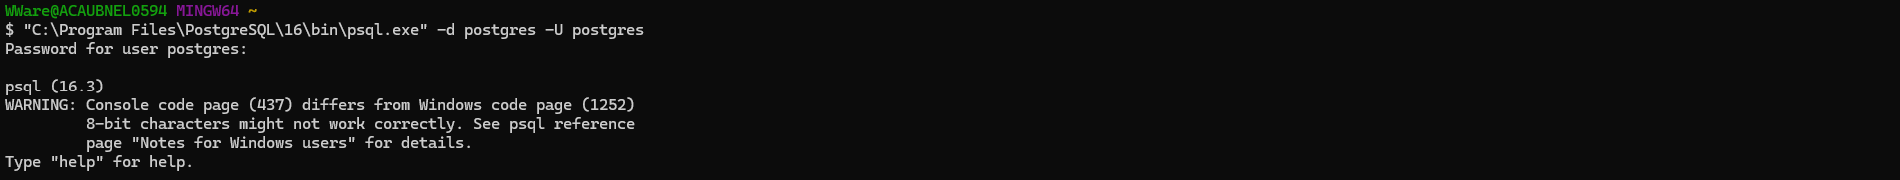
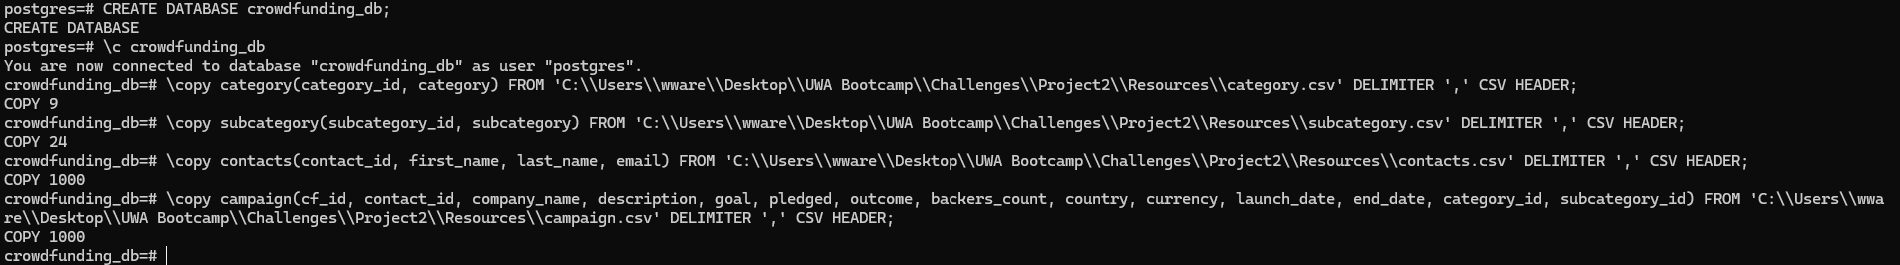

**The schema code is saved as:** `crowdfinding_db_schema.sql`